36


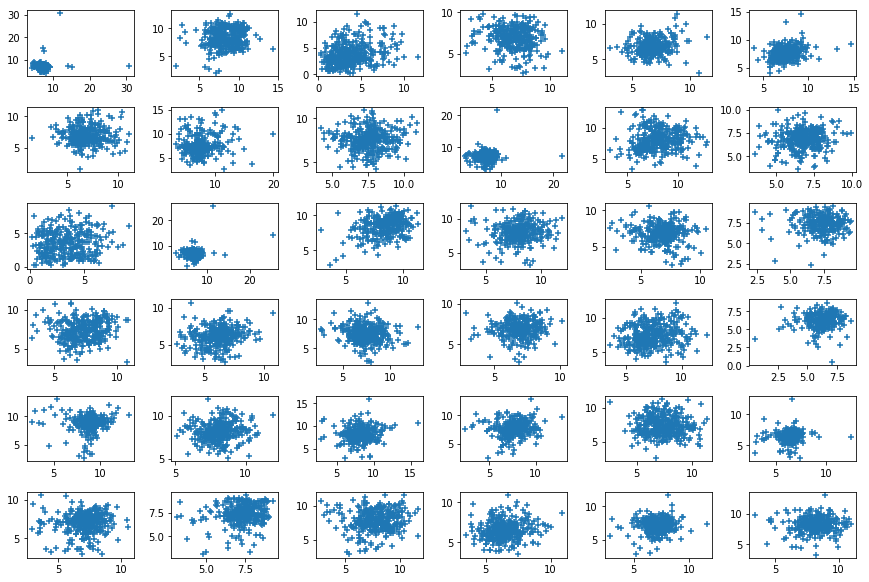

In [18]:
######################################################################
# Modelling Sleep Duration Using Gaussian Processes
# LE49: MiniProject
# Jan Ondras (jo356), Trinity College
# 2017/2018
######################################################################
##############################################################################################################
# Daily, day-to-day correlations for sleepduration
##############################################################################################################

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.io, scipy.stats, scipy.linalg
from numpy.linalg import solve
import glob
from scipy import stats
import time
%matplotlib inline

t = 'sleepduration' # type of data to extract
min_num_measurements = 300#362

N_users_to_show = 36

types = {
    'sleepduration': '10',
    'bedin': '11',
    'bedout': '12',
    'steps': '1',
    'weight': '2',
    'bloodpressure': '4',
    'heartrate': '7'
}

c_data = []

st = time.time()
cnt = 0
# For each user
for file_name in glob.glob('./../Dataset/' + t + '/*.npz'):
    UID = file_name.split('/')[-1][:-4]
    data = np.load(file_name)['xy']
    
    if len(data) < min_num_measurements:
        continue
        
    data = sorted(data, key=lambda x: x[0]) # sort by x
    
    ypairs = []
    # extract pairs (y1, y2) where x1 = x2-1
    for i in range(len(data)-1):
        if data[i][0] == data[i+1][0] - 1: # shift by one day
            ypairs.append( [ data[i][1], data[i+1][1] ] )
            
    c_data.append( np.array(ypairs) )
        
    cnt += 1
    if cnt >= N_users_to_show:
        break
print (len(c_data))

# Show 9 users, their distributions
with matplotlib.rc_context({'figure.figsize': [2*np.sqrt(N_users_to_show),4*np.sqrt(N_users_to_show)/3], 'axes.titlesize': 10}):
    fig = plt.figure()
    for i, d in enumerate(c_data):

        ax = fig.add_subplot(np.sqrt(N_users_to_show), np.sqrt(N_users_to_show), i+1)  
        ax.scatter(d[:,0], d[:,1], marker='+')

#         ax.set_xlim([4,12])
#         ax.set_title(f'{i}')

    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    plt.show()

36


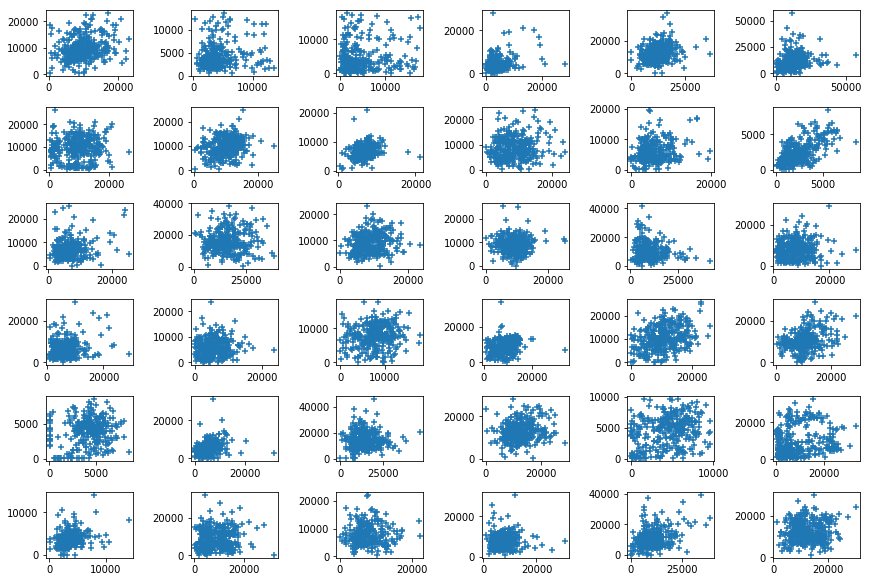

In [19]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.io, scipy.stats, scipy.linalg
from numpy.linalg import solve
import glob
from scipy import stats
import time
%matplotlib inline

t = 'steps' # type of data to extract
min_num_measurements = 300#362

N_users_to_show = 36

types = {
    'sleepduration': '10',
    'bedin': '11',
    'bedout': '12',
    'steps': '1',
    'weight': '2',
    'bloodpressure': '4',
    'heartrate': '7'
}

c_data = []

st = time.time()
cnt = 0
# For each user
for file_name in glob.glob('./../Dataset/' + t + '/*.npz'):
    UID = file_name.split('/')[-1][:-4]
    data = np.load(file_name)['xy']
    
    if len(data) < min_num_measurements:
        continue
        
    data = sorted(data, key=lambda x: x[0]) # sort by x
    
    ypairs = []
    # extract pairs (y1, y2) where x1 = x2-1
    for i in range(len(data)-1):
        if data[i][0] == data[i+1][0] - 1: # shift by one day
            ypairs.append( [ data[i][1], data[i+1][1] ] )
            
    c_data.append( np.array(ypairs) )
        
    cnt += 1
    if cnt >= N_users_to_show:
        break
print (len(c_data))

# Show 9 users, their distributions
with matplotlib.rc_context({'figure.figsize': [2*np.sqrt(N_users_to_show),4*np.sqrt(N_users_to_show)/3], 'axes.titlesize': 10}):
    fig = plt.figure()
    for i, d in enumerate(c_data):

        ax = fig.add_subplot(np.sqrt(N_users_to_show), np.sqrt(N_users_to_show), i+1)  
        ax.scatter(d[:,0], d[:,1], marker='+')

#         ax.set_xlim([4,12])
#         ax.set_title(f'{i}')

    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    plt.show()

In [2]:
###########################################################
# Correlation between: mean sleepduration, OR mean sleepduration weekdays, mean sleepduration weekends
###########################################################
from datetime import datetime, timedelta
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.io, scipy.stats, scipy.linalg
from numpy.linalg import solve
import glob
from scipy import stats
import time

msds = [] # mean sleep durations for each UID
msds_wd = [] # weekdays
msds_we = [] # weekends 

mbis = [] # mean bedin time for each UID
mbis_wd = [] # weekdays
mbis_we = [] # weekends 

mbos = [] # mean bedout time for each UID
mbos_wd = [] # weekdays
mbos_we = [] # weekends 

mscs = [] # mean step count for each UID
mscs_wd = [] # weekdays
mscs_we = [] # weekends 

Np = 0

################################ Sleepduration first
for file_name in glob.glob('./../Dataset/sleepduration/*.npz'):
    Np += 1
    UID_data = np.load(file_name)['xy'] # get x,y data
    wd = []
    we = []
    for xxx,yyy in UID_data:
        if xxx % 7 == 2 or xxx % 7 == 3: # is weekend? 0 means 31/3/2016 which was Thursday
            we.append(yyy)
        else:
            wd.append(yyy)
    msds.append( [np.mean(UID_data[:,1])] ) # mean of all y-values
    msds_wd.append( [np.mean(wd)] ) # mean of all y-values from weekdays
    msds_we.append( [np.mean(we)] ) # mean of all y-values from weekends
    
################################ Bedin
for file_name in glob.glob('./../Dataset/bedin/*.npz'):
    UID_data = np.load(file_name)['xy'] # get x,y data
    wd = []
    we = []
    for xxx,yyy in UID_data:
        if xxx % 7 == 2 or xxx % 7 == 3: # is weekend? 0 means 31/3/2016 which was Thursday
            we.append(yyy)
        else:
            wd.append(yyy)
    mbis.append( [np.mean(UID_data[:,1])] ) # mean of all y-values
    mbis_wd.append( [np.mean(wd)] ) # mean of all y-values from weekdays
    mbis_we.append( [np.mean(we)] ) # mean of all y-values from weekends
    
################################ Bedout   
for file_name in glob.glob('./../Dataset/bedout/*.npz'):
    UID_data = np.load(file_name)['xy'] # get x,y data
    wd = []
    we = []
    for xxx,yyy in UID_data:
        if xxx % 7 == 2 or xxx % 7 == 3: # is weekend? 0 means 31/3/2016 which was Thursday
            we.append(yyy)
        else:
            wd.append(yyy)
    mbos.append( [np.mean(UID_data[:,1])] ) # mean of all y-values
    mbos_wd.append( [np.mean(wd)] ) # mean of all y-values from weekdays
    mbos_we.append( [np.mean(we)] ) # mean of all y-values from weekends
    
################################ Steps  
for file_name in glob.glob('./../Dataset/steps/*.npz'):
    Np -= 1
    if Np < 0:
        break
    UID_data = np.load(file_name)['xy'] # get x,y data
    wd = []
    we = []
    for xxx,yyy in UID_data:
        if xxx % 7 == 2 or xxx % 7 == 3: # is weekend? 0 means 31/3/2016 which was Thursday
            we.append(yyy)
        else:
            wd.append(yyy)
    mscs.append( [np.mean(UID_data[:,1])] ) # mean of all y-values
    mscs_wd.append( [np.mean(wd)] ) # mean of all y-values from weekdays
    mscs_we.append( [np.mean(we)] ) # mean of all y-values from weekends
    
# What to add ? 
X = np.array(msds)  # add msds
X = np.concatenate((X, np.array(msds_wd)), axis=1) # add msds weekdays
X = np.concatenate((X, np.array(msds_we)), axis=1) # add msds weekends

X = np.concatenate((X, np.array(mbis)), axis=1) # add msds
X = np.concatenate((X, np.array(mbis_wd)), axis=1) # add msds weekdays
X = np.concatenate((X, np.array(mbis_we)), axis=1) # add msds weekends

X = np.concatenate((X, np.array(mbos)), axis=1) # add msds
X = np.concatenate((X, np.array(mbos_wd)), axis=1) # add msds weekdays
X = np.concatenate((X, np.array(mbos_we)), axis=1) # add msds weekends

X = np.concatenate((X, np.array(mscs)), axis=1) # add msds
X = np.concatenate((X, np.array(mscs_wd)), axis=1) # add msds weekdays
X = np.concatenate((X, np.array(mscs_we)), axis=1) # add msds weekends

# print X[:3]
# print "Min: ", np.min(X, axis=0).tolist() #np.exp(np.min(X, axis=0))
# print "Max: ", np.max(X, axis=0).tolist() #np.exp(np.max(X, axis=0))

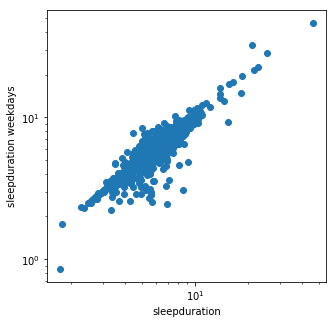

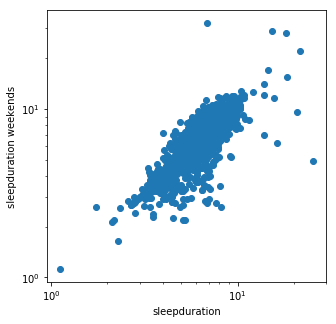

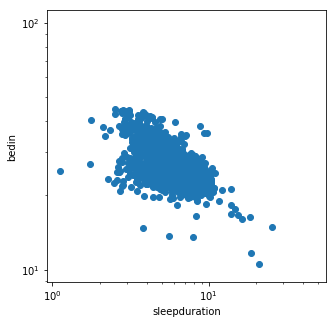

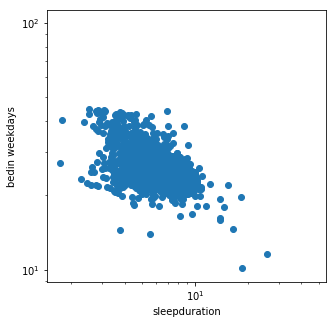

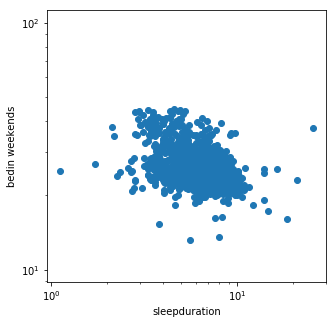

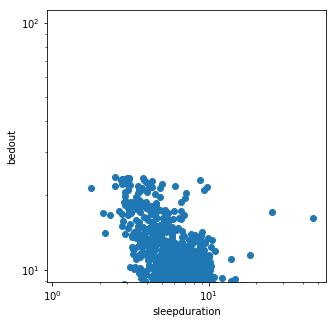

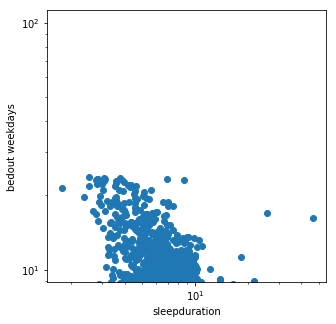

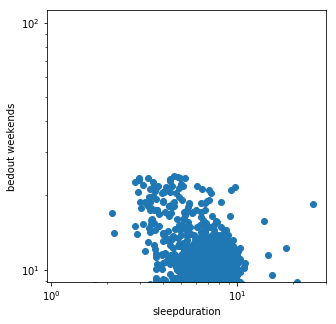

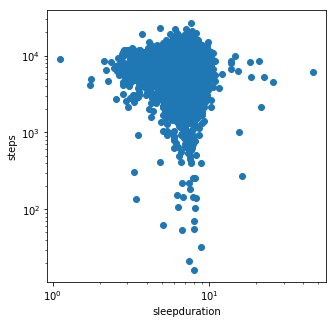

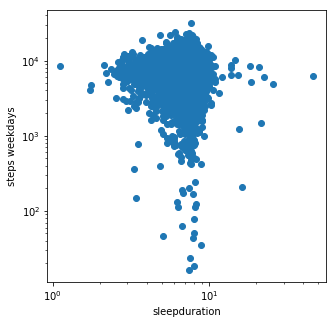

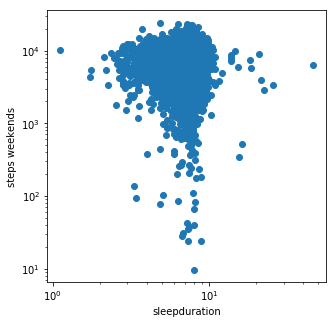

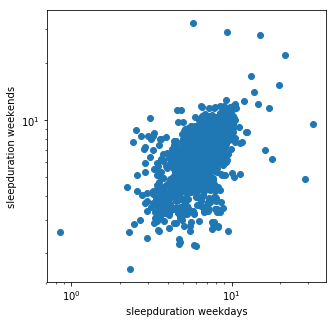

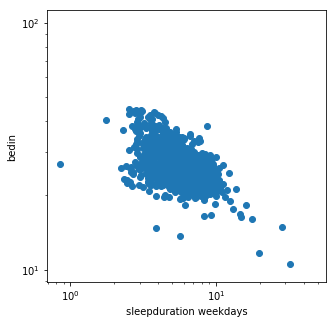

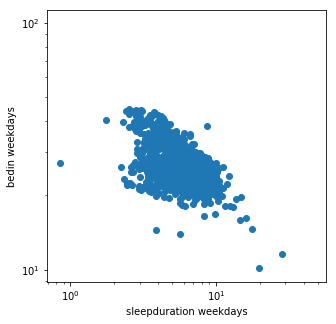

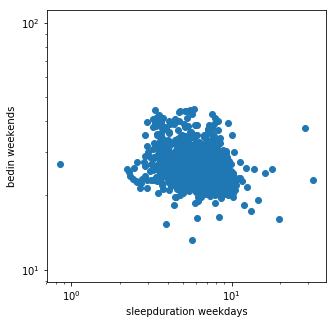

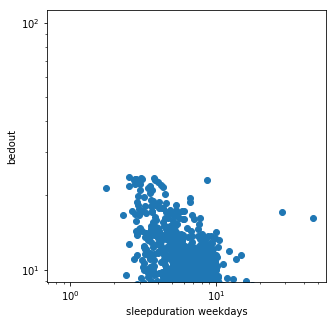

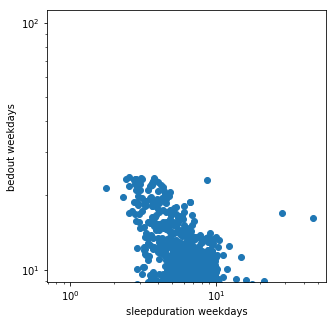

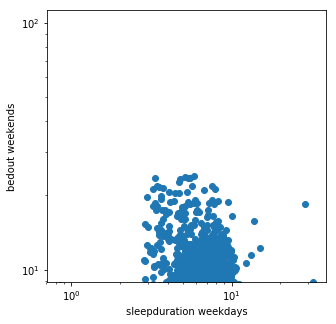

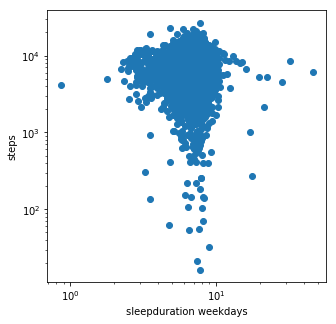

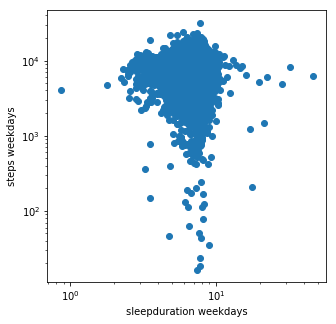

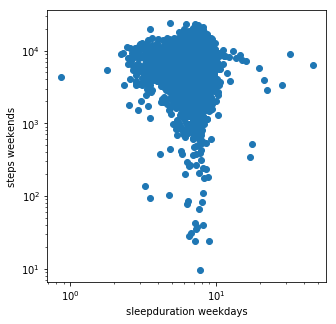

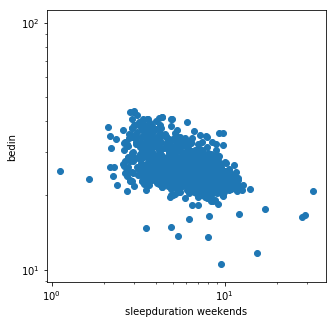

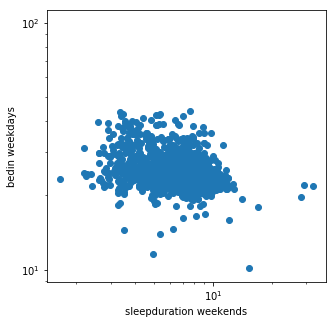

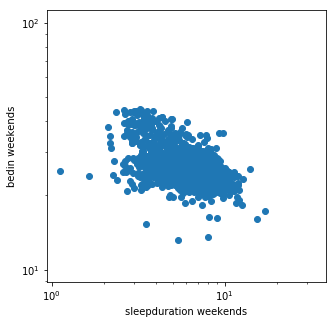

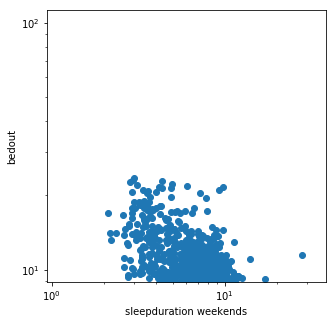

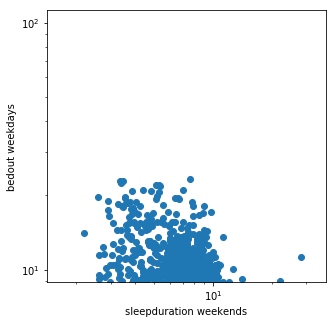

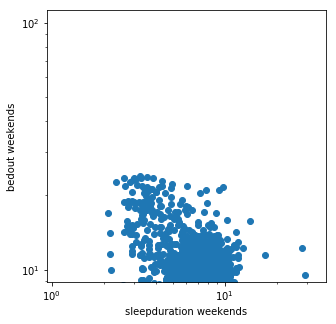

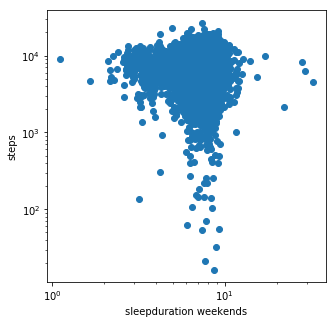

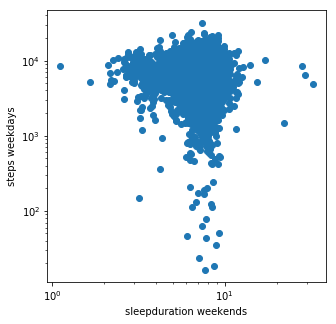

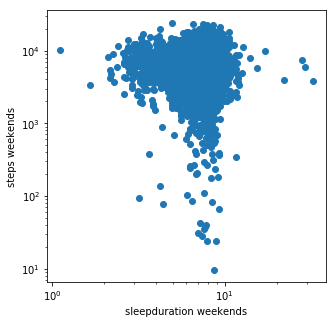

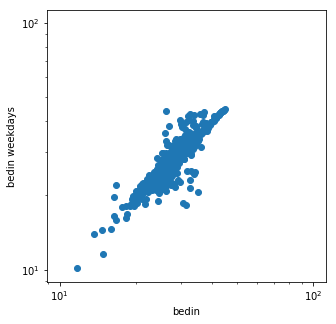

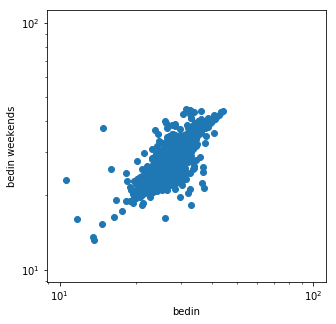

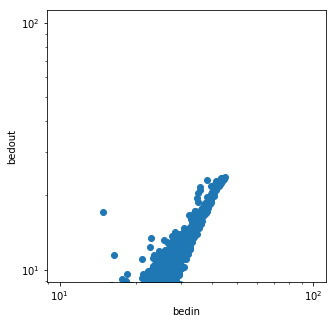

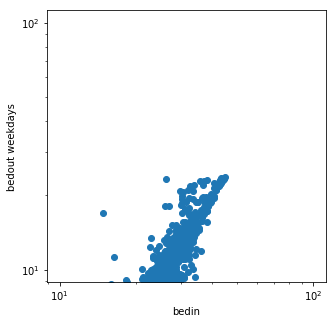

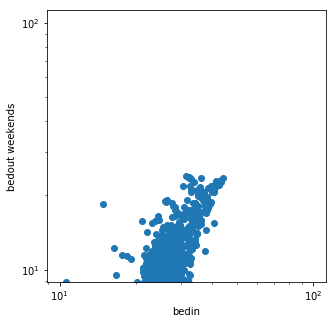

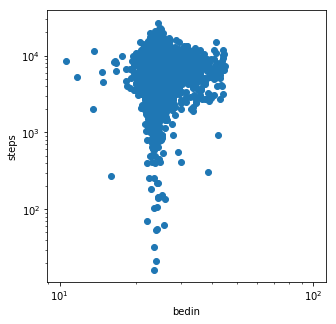

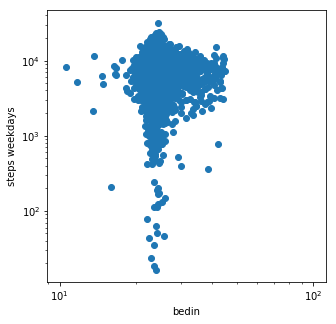

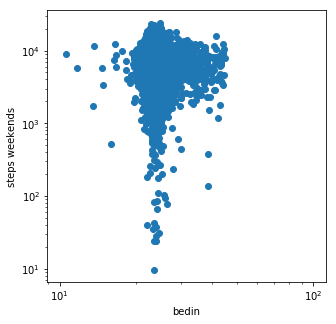

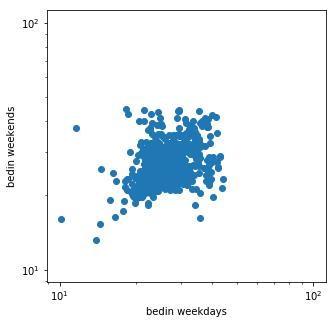

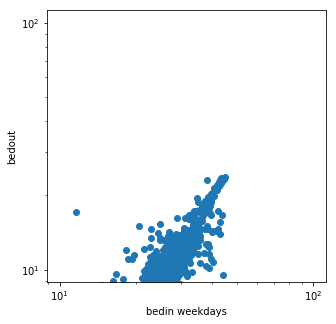

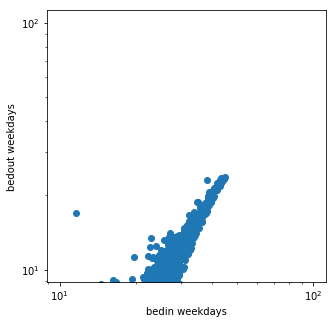

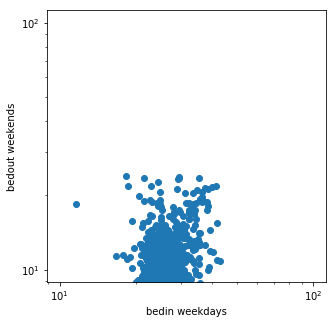

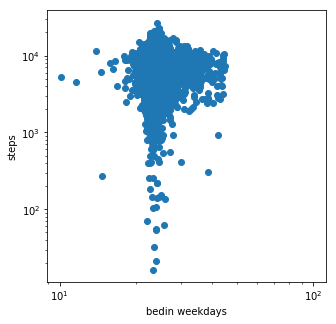

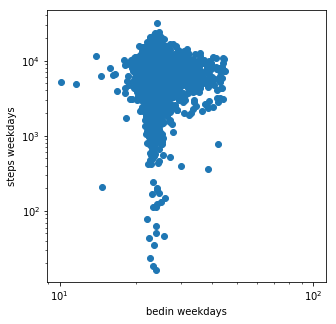

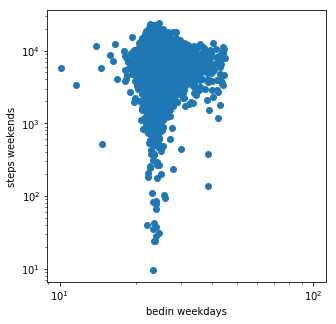

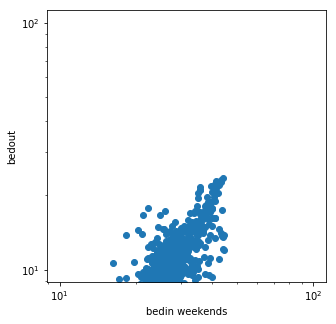

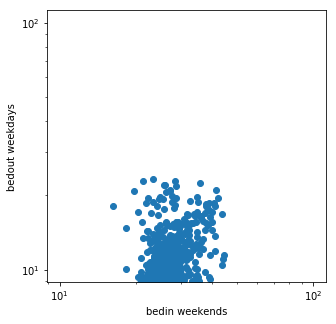

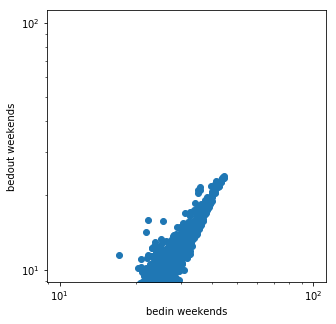

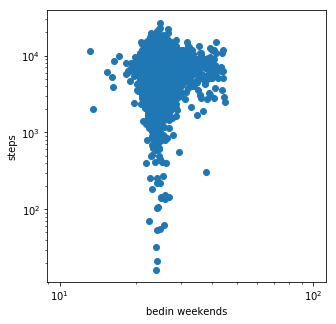

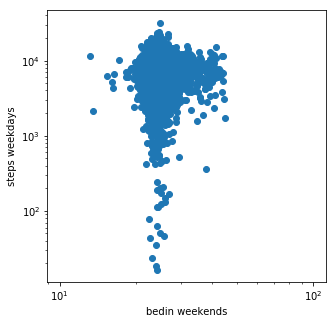

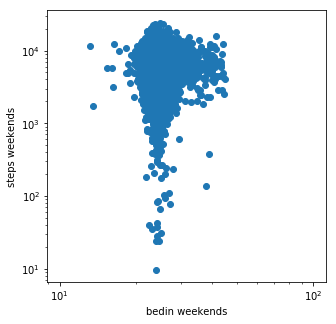

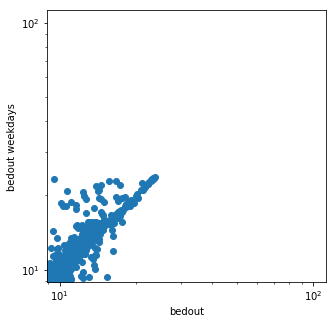

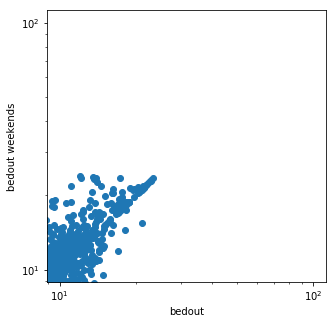

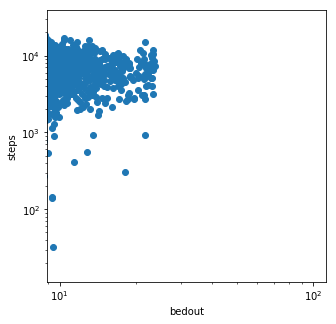

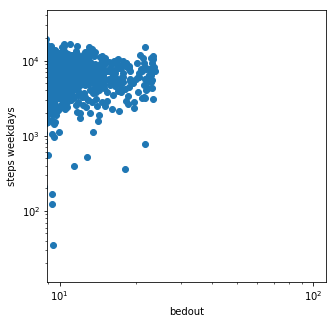

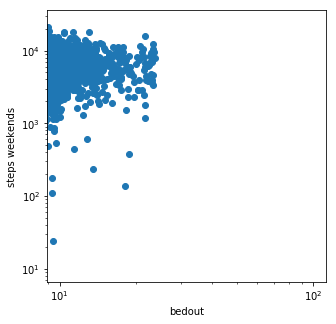

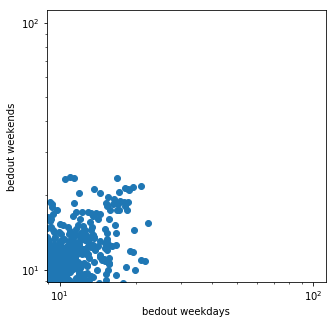

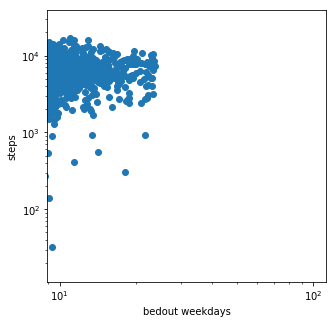

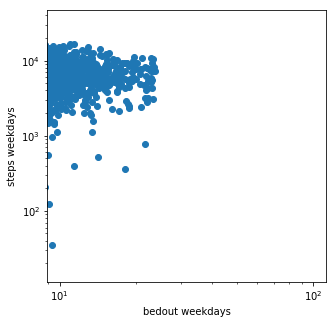

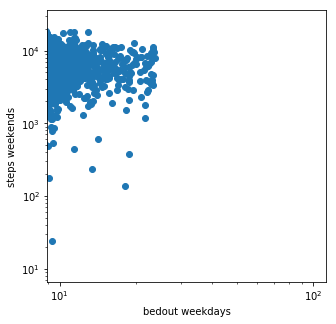

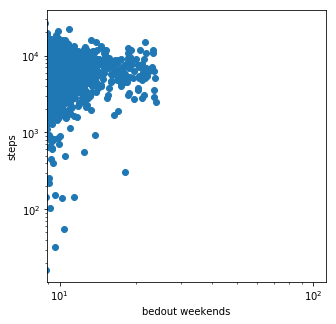

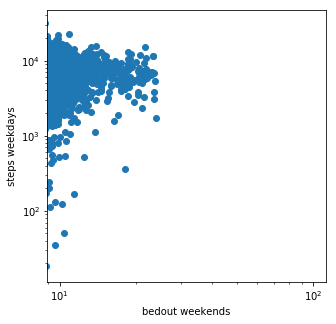

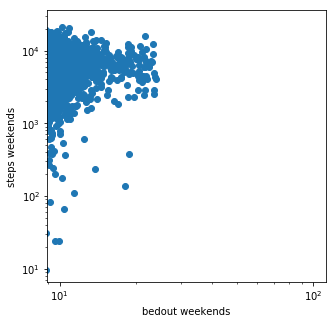

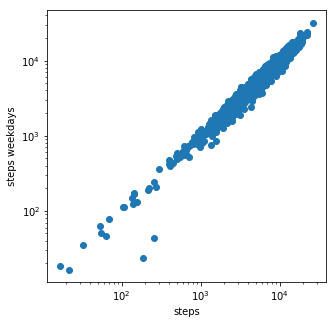

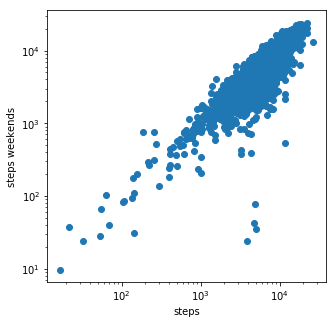

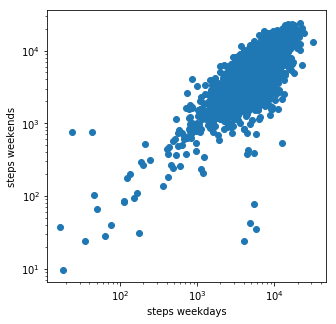

In [6]:
N = 12

params_names = ['sleepduration', 'sleepduration weekdays', 'sleepduration weekends', 
               'bedin', 'bedin weekdays', 'bedin weekends', 
               'bedout', 'bedout weekdays', 'bedout weekends', 
               'steps', 'steps weekdays', 'steps weekends']

for i in range(0, 11):
    for j in range(i+1, 12):
        plt.figure(figsize=(5,5))
        plt.scatter(X[:,i], X[:,j])
        plt.xlabel(params_names[i])
        plt.ylabel(params_names[j])
        plt.yscale('log')
        plt.xscale('log')
    #     plt.xlim(0,15)
        plt.show()